<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/nse_pe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nsepy --q

In [24]:
from nsepy import get_index_pe_history ,get_history
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt

In [12]:

nifty_pe = get_index_pe_history(symbol="NIFTY",
                                start=date(2007,1,1),
                                end=date(2022,10,1))

In [14]:
nifty_fut = get_history(symbol="NIFTY",
                        start=date(2007,1,1),
                        end=date(2022,10,1),
                        index=True,
                        futures=False)

In [15]:
data=pd.concat([nifty_fut,nifty_pe],axis=1)

In [16]:
data.to_csv('data.csv')

In [18]:
data.head(2)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2007-01-02,3966.25,4016.65,3964.95,4007.40,40789960.0,1.929760e+10,21.48,5.12,1.2
2007-01-03,4007.70,4029.80,3985.00,4024.05,63826475.0,3.291660e+10,21.57,5.14,1.2


In [23]:
data['earnings']=data['Close']/data['P/E']

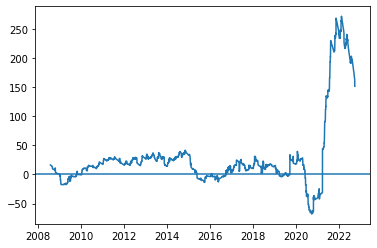

In [61]:
plt.plot(data['earnings']-data['earnings'].rolling(window=400).mean())
plt.axhline(y=0);

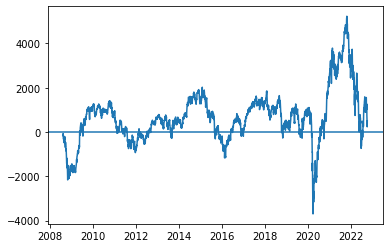

In [59]:
plt.plot(data['Close']-data['Close'].rolling(window=400).mean())
plt.axhline(y=0);

In [57]:
data['Close'].rolling(window=800).mean()[-1]

14072.315062500002

In [26]:
from sklearn import linear_model

In [36]:
reg = linear_model.LinearRegression()
reg.fit(data[['Close']], data.earnings)

LinearRegression()

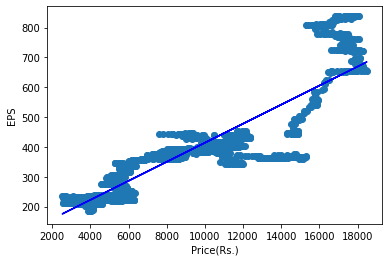

In [38]:
plt.ylabel("EPS")
plt.xlabel("Price(Rs.)")
plt.scatter(data.Close, data.earnings)
plt.plot(data.Close, reg.predict(data[['Close']]), color='blue');

In [47]:
import numpy as np
print(17000*.7)
print(reg.predict(np.array([[17000*0.7]])))

11900.0
[474.45244925]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


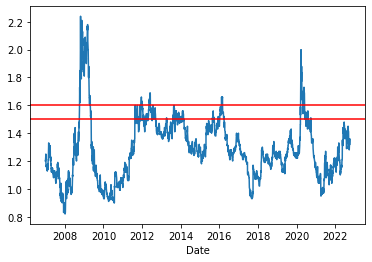

In [44]:
data['Div Yield'].plot()
plt.axhline(y=1.5,color='r');
plt.axhline(y=1.6,color='r');
